In [1]:
from selenium import webdriver 
import time 
from bs4 import BeautifulSoup
import pandas as pd

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException
from selenium.webdriver.common.action_chains import ActionChains

import time

import pandas as pd  # Import pandas and use shorthand notation pd to save on typing
# can also import Series and DataFrame into the local namespace to save on typing pd. every time:
from pandas import Series, DataFrame 
import numpy as np                            
import statsmodels.api as sm # import statsmodels 

np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 30
np.set_printoptions(precision=4, suppress=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [3]:
driver=webdriver.Chrome(executable_path ="C:\Program Files\Google\Chrome\chromedriver.exe") #run the selenium webdriver, which can be downloaded here https://chromedriver.storage.googleapis.com/index.html?path=91.0.4472.19/

driver.implicitly_wait(5)
driver.get("http://hdr.undp.org/en/data")
iframe = [ele for ele in driver.find_elements_by_tag_name("iframe") if 
ele.get_attribute("title") == "Human Development Index (HDI) Ranking"][0]

driver.get(iframe.get_attribute("src"))

page = 1
t = [[] for _ in range(7)]
while page<19:
    for row in driver.find_elements_by_class_name("css-kfswhc"):
        col = [col.text for col in row.find_elements_by_tag_name("td")[1:]]
        for i,mylist in enumerate(t):
            mylist.append(col[i])
    page+=1
    driver.find_element_by_class_name("next").click()

df=pd.DataFrame({"Rank":t[0],"Country":t[1],"HDI_Val":t[2],"Life_ex":t[3],"Ex_schl":t[4],"Mean_schl":t[5],"GNI_pc":t[6]})
print(df)

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [ ]:
df.to_csv('hdi_ind.csv',index=False) #this can be exported to a .csv file

In [19]:
df.head

<bound method NDFrame.head of     Rank                 Country HDI_Val Life_ex Ex_schl Mean_schl  GNI_pc
0      1                  Norway   0.957    82.4    18.1      12.9  66,494
1      2                 Ireland   0.955    82.3    18.7      12.7  68,371
2      2             Switzerland   0.955    83.8    16.3      13.4  69,394
3      4  Hong Kong, China (SAR)   0.949    84.9    16.9      12.3  62,985
4      4                 Iceland   0.949    83.0    19.1      12.8  54,682
..   ...                     ...     ...     ...     ...       ...     ...
175  175           Guinea-Bissau   0.480    58.3    10.6       3.6   1,996
176  175                 Liberia   0.480    64.1     9.6       4.8   1,258
177  178                  Guinea   0.477    61.6     9.4       2.8   2,405
178  179                   Yemen   0.470    66.1     8.8       3.2   1,594
179  180                 Eritrea   0.459    66.3     5.0       3.9   2,793

[180 rows x 7 columns]>

In [20]:
import pandas as pd  # Import pandas and use shorthand notation pd to save on typing
# can also import Series and DataFrame into the local namespace to save on typing pd. every time:
from pandas import Series, DataFrame 
import numpy as np                            
import statsmodels.api as sm # import statsmodels 

df = df[['GNI_pc', 'HDI_Val', 'Life_ex', 'Ex_schl', 'Mean_schl',]]
df = sm.tools.tools.add_constant(df)
df.head(3)

,const,GNI_pc,HDI_Val,Life_ex,Ex_schl,Mean_schl
0,1.0,"66,494",0.957,82.4,18.1,12.9
1,1.0,"68,371",0.955,82.3,18.7,12.7
2,1.0,"69,394",0.955,83.8,16.3,13.4


In [21]:
df.dtypes

const        float64
GNI_pc        object
HDI_Val       object
Life_ex       object
Ex_schl       object
Mean_schl     object
dtype: object

In [22]:
df["HDI_Val"] = pd.to_numeric(df["HDI_Val"])
df["GNI_pc"] = df["GNI_pc"].str.replace(',', '').astype(float)



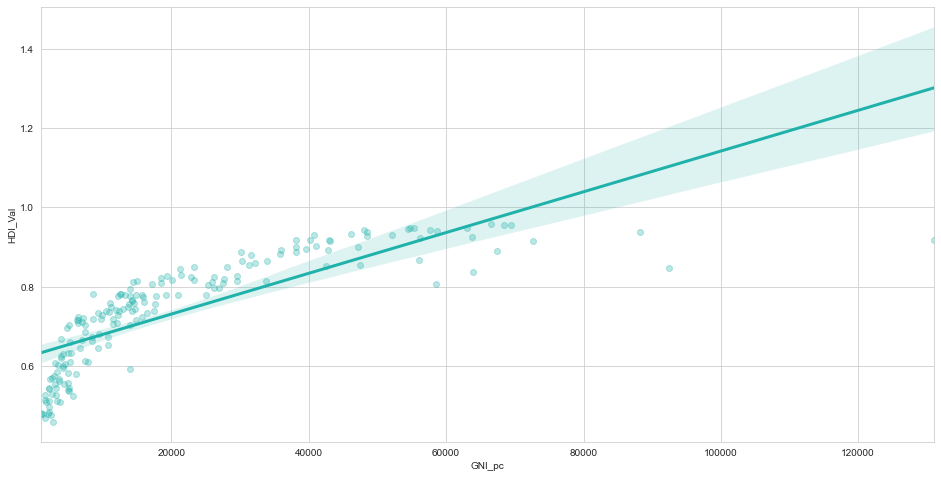

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.regplot(x='GNI_pc', y='HDI_Val', data=df, color='lightseagreen', scatter_kws={'alpha':0.3}, line_kws={'linewidth':3});

In [25]:
X = df[['const','GNI_pc']]
y = df["HDI_Val"]
model = sm.OLS(y, X) 
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HDI_Val   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     307.2
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.29e-40
Time:                        20:18:19   Log-Likelihood:                 192.28
No. Observations:                 180   AIC:                            -380.6
Df Residuals:                     178   BIC:                            -374.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6285      0.009     71.507      0.000       0.611       0.646
GNI_pc      5.136e-06   2.93e-07     17.528      0.000    4.56e-06    5.71e-06
==============================================================================
Omnibus:                       37.481   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.502
Skew:                          -1.142   Prob(JB):                     5.38e-13
Kurtosis:                       4.523   Cond. No.                     4.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

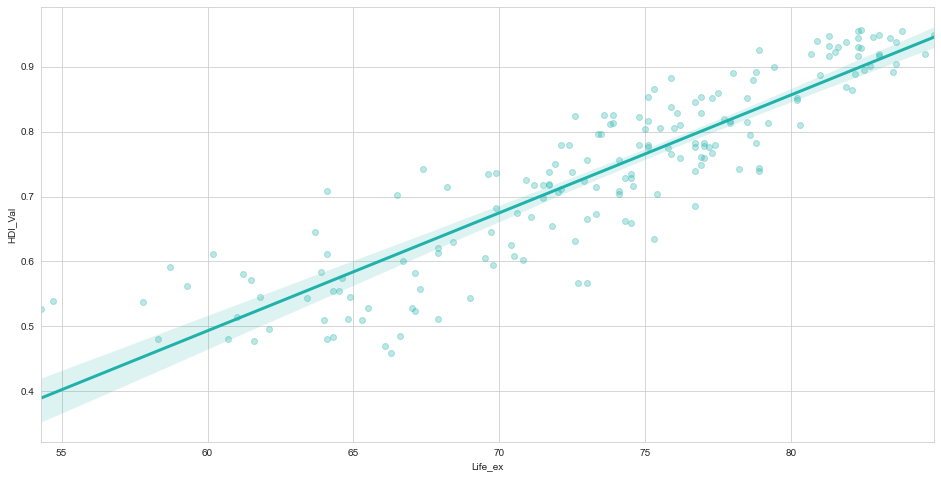

In [28]:
X = df[['const','Life_ex']]
y = df["HDI_Val"]

df["Life_ex"] = pd.to_numeric(df["Life_ex"]) #we want to turn these objects into floats for modelling
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.regplot(x='Life_ex', y='HDI_Val', data=df, color='lightseagreen', scatter_kws={'alpha':0.3}, line_kws={'linewidth':3} );

In [29]:
model = sm.OLS(y, X) 
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HDI_Val   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     711.4
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           4.36e-64
Time:                        20:21:45   Log-Likelihood:                 246.82
No. Observations:                 180   AIC:                            -489.6
Df Residuals:                     178   BIC:                            -483.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5963      0.050    -11.877      0.000      -0.695      -0.497
Life_ex        0.0182      0.001     26.673      0.000       0.017       0.020
==============================================================================
Omnibus:                        1.565   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.622
Skew:                          -0.218   Prob(JB):                        0.444
Kurtosis:                       2.836   Cond. No.                         804.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

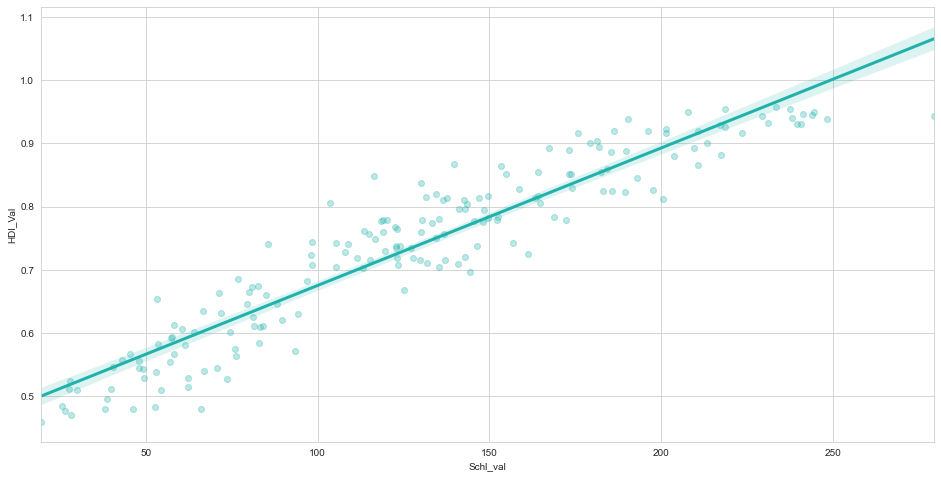

In [30]:
df["Ex_schl"] = pd.to_numeric(df["Ex_schl"]) #more data to turn into floats
df["Mean_schl"] = pd.to_numeric(df["Mean_schl"])
df["Schl_val"] = df["Ex_schl"] * df["Mean_schl"] #we want to make a covariate analysis
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.regplot(x='Schl_val', y='HDI_Val', data=df, color='lightseagreen', scatter_kws={'alpha':0.3},line_kws={'linewidth':3} );

In [31]:
X = df[['const','Schl_val']] 
y = df["HDI_Val"]

model = sm.OLS(y, X) 
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HDI_Val   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1379.
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           9.36e-86
Time:                        20:22:21   Log-Likelihood:                 297.22
No. Observations:                 180   AIC:                            -590.4
Df Residuals:                     178   BIC:                            -584.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4576      0.008     55.192      0.000       0.441       0.474
Schl_val       0.0022   5.86e-05     37.137      0.000       0.002       0.002
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.232
Skew:                           0.071   Prob(JB):                        0.890
Kurtosis:                       2.897   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
z=3.9
y=2.5

In [6]:
print(y+z)

6.4


In [7]:
type(z)

float